In [1]:
import pandas as pd
import os
import math
import numpy as np
import re
import seaborn as sns
import matplotlib.pylab as plt

In [2]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

n_train = train.shape[0]
n_test = test.shape[0]

print(str(n_train) + ' training samples, ' + str(n_test) + ' test samples')

891 training samples, 418 test samples


In [3]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [5]:
full_data = [train, test]

# Some features of my own that I have added in
# Gives the length of the name
# train['Name_length'] = train['Name'].apply(len)
# test['Name_length'] = test['Name'].apply(len)
# Feature that tells whether a passenger had a cabin on the Titanic
train['Has_Cabin'] = train["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
test['Has_Cabin'] = test["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

# Feature engineering steps taken from Sina
# Create new feature FamilySize as a combination of SibSp and Parch
for dataset in full_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
# Create new feature IsAlone from FamilySize
for dataset in full_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
# Remove all NULLS in the Embarked column (fill with most common category)
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
# Remove all NULLS in the Fare column and create a new feature CategoricalFare
for dataset in full_data:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())
#train['CategoricalFare'] = pd.qcut(train['Fare'], 4)
# Create a New feature CategoricalAge
# for dataset in full_data:
#     age_avg = dataset['Age'].mean()
#     age_std = dataset['Age'].std()
#     age_null_count = dataset['Age'].isnull().sum()  # counts the number of NaN is the Age column
#     age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
#     # fill missing ages with random ages around mean age (questionable...)
#     dataset.loc[dataset['Age'].isnull(), 'Age'] = age_null_random_list  
#     dataset['Age'] = dataset['Age'].astype(int)

n_age_bins = 5
# train['CategoricalAge'], age_bins = pd.cut(train['Age'], n_age_bins, labels=range(n_age_bins), retbins=True)
train['CategoricalAge'], age_bins = pd.cut(train['Age'], n_age_bins, retbins=True)

# Define function to extract titles from passenger names
#def get_title(name):
#    title_search = re.search(' ([A-Za-z]+)\.', name)
#    # If the title exists, extract and return it.
#    if title_search:
#        return title_search.group(1)
#    return ""

# Create a new feature Title, containing the titles of passenger names
#for dataset in full_data:
#    dataset['Title'] = dataset['Name'].apply(get_title)
# Group all non-common titles into one single grouping "Rare"
#for dataset in full_data:
#    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')#
#
#    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
#    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
#    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

for dataset in full_data:
    # Mapping Sex
    #dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
    dataset['Sex'] = dataset['Sex'].astype('category').cat.codes
    dataset['Embarked'] = dataset['Embarked'].astype('category').cat.codes
    
    # Mapping Embarked
    #dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    #dataset['Embarked'] = dataset['Embarked'].astype("category").cat.codes
    # dataset = pd.get_dummies(dataset, columns=['Embarked'])
    
#    # Mapping titles
#    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
#    dataset['Title'] = dataset['Title'].map(title_mapping)
#    dataset['Title'] = dataset['Title'].fillna(0)
    
    
#    # Mapping Fare
#    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] 						        = 0
#    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
#    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
#    dataset.loc[ dataset['Fare'] > 31, 'Fare'] 							        = 3
#    dataset['Fare'] = dataset['Fare'].astype(int)
    
#    # Mapping Age
#    dataset.loc[ dataset['Age'] <= 16, 'Age'] 					       = 0
#    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
#    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
#    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
#    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4 ;

train = pd.get_dummies(train, columns=['Embarked'])
test = pd.get_dummies(test, columns=['Embarked'])

In [8]:
train.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Has_Cabin,FamilySize,IsAlone,CategoricalAge,Embarked_0,Embarked_1,Embarked_2
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,2,0,"(16.336, 32.252]",0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,2,0,"(32.252, 48.168]",1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,1,"(16.336, 32.252]",0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,1,2,0,"(32.252, 48.168]",0,0,1


In [32]:
features = ['Embarked']
# features = ['Sex', 'CategoricalAge']
# features = ['Sex']

# train[[feature, 'Survived']].groupby([feature]).mean()
train[features + ['Survived']].groupby(features).mean()

KeyError: "['Embarked'] not in index"

In [23]:
drop_elements = ['Name', 'Ticket', 'Cabin', 'SibSp', 'Parch']
train = train.drop(drop_elements, axis = 1)
test = test.drop(drop_elements, axis = 1)


In [24]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Has_Cabin,FamilySize,IsAlone
0,1,0,3,1,22,7.2500,2,0,2,0
1,2,1,1,0,38,71.2833,0,1,2,0
2,3,1,3,0,26,7.9250,2,0,1,1
3,4,1,1,0,35,53.1000,2,1,2,0
4,5,0,3,1,35,8.0500,2,0,1,1
5,6,0,3,1,35,8.4583,1,0,1,1
6,7,0,1,1,54,51.8625,2,1,1,1
7,8,0,3,1,2,21.0750,2,0,5,0
8,9,1,3,0,27,11.1333,2,0,3,0
9,10,1,2,0,14,30.0708,0,0,2,0


In [25]:
train.count()

PassengerId    891
Survived       891
Pclass         891
Sex            891
Age            891
Fare           891
Embarked       891
Has_Cabin      891
FamilySize     891
IsAlone        891
dtype: int64

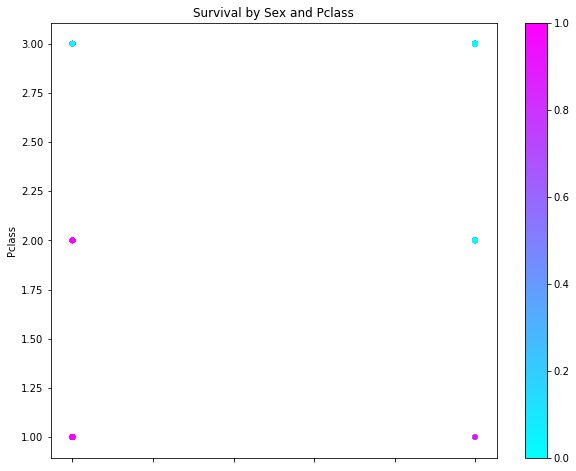

In [29]:
% matplotlib inline
xdata = 'Sex'
ydata = 'Pclass'
train.plot(kind='scatter',
           x=xdata,
           y=ydata,
           c=train['Survived'],
           cmap='cool',
           title='Survival by ' + xdata + ' and ' + ydata, 
           figsize=(10, 8))
plt.xlabel(xdata)
plt.show()


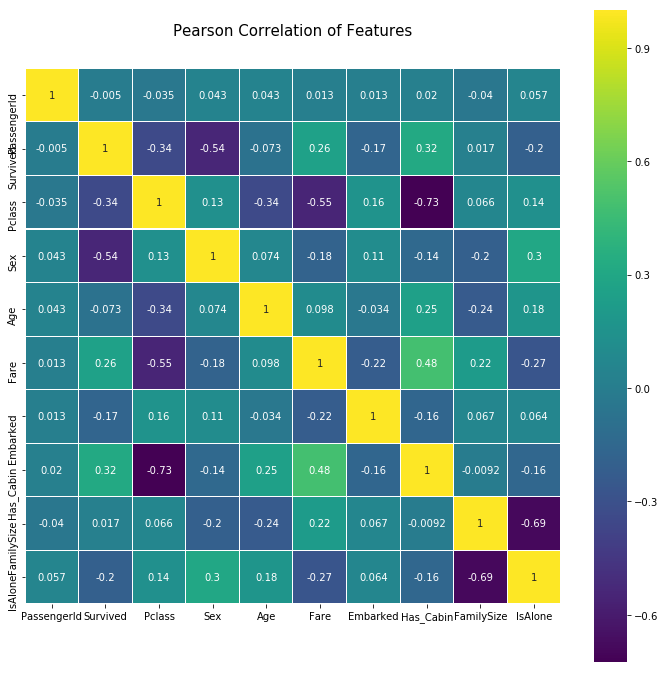

In [28]:
colormap = plt.cm.viridis
plt.figure(figsize=(12, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white',
            annot=True)
